In [3]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/StudentsPerformance.csv')
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [10]:
df.corr().describe().T

count      mean       std       min       25%       50%  \
math score       3.0  0.873407  0.109887  0.802642  0.810111  0.817580   
reading score    3.0  0.924059  0.094967  0.817580  0.886089  0.954598   
writing score    3.0  0.919080  0.103362  0.802642  0.878620  0.954598   

                    75%  max  
math score     0.908790  1.0  
reading score  0.977299  1.0  
writing score  0.977299  1.0

In [11]:
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [12]:
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                  100
reading score                               100
writing score                               100
dtype: object

In [13]:
df.min()

gender                                     female
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                      0
reading score                                  17
writing score                                  10
dtype: object

In [14]:
for i in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('--------------------------------------------------------------------')

unique values in column "gender" is
 female    518
male      482
Name: gender, dtype: int64
--------------------------------------------------------------------
unique values in column "race/ethnicity" is
 group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
--------------------------------------------------------------------
unique values in column "parental level of education" is
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
--------------------------------------------------------------------
unique values in column "lunch" is
 standard        645
free/reduced    355
Name: lunch, dtype: int64
--------------------------------------------------------------------
unique values in column "test preparation course" is
 none         642
completed    358
Name: test preparation co

In [15]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [16]:
df.rename(columns = {'race/ethnicity': 'race'}, inplace = True)

In [17]:
df.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Text(0.5, 1.0, 'Math Score With Race')

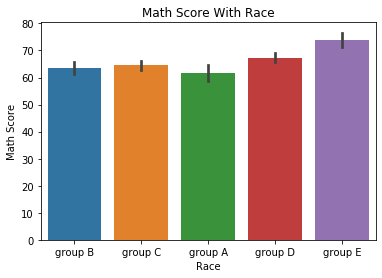

In [18]:
ax = sns.barplot(x="race", y="math score", data=df)
plt.ylabel('Math Score')
plt.xlabel('Race')
plt.title('Math Score With Race')

Text(0.5, 1.0, 'Math Score With Race,Gender')

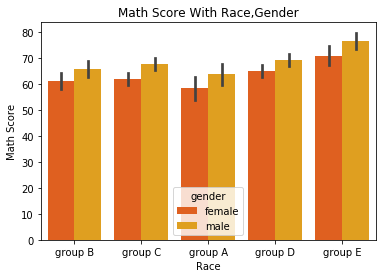

In [19]:
ax = sns.barplot(x="race", y="math score", hue="gender", data=df,palette='autumn')
plt.ylabel('Math Score')
plt.xlabel('Race')
plt.title('Math Score With Race,Gender')

Text(0.5, 1.0, 'Math Score With Race,Gender,Parental Level Of Education')

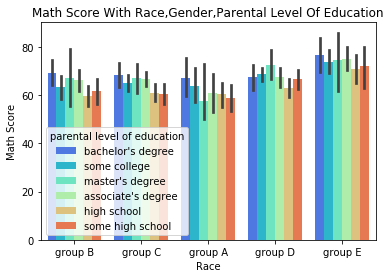

In [20]:
ax = sns.barplot(x="race", y="math score", hue="parental level of education", data=df,palette='rainbow')
plt.ylabel('Math Score')
plt.xlabel('Race')
plt.title('Math Score With Race,Gender,Parental Level Of Education')

In [21]:
df_rece_math=df.groupby(by =['race'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

fig = go.Figure(go.Bar(
    y=df_rece_math['Race'],x=df_rece_math['Reading Score'],orientation="h",
    marker={'color': df_rece_math['Reading Score'], 
    'colorscale': 'sunsetdark'},  
    text=df_rece_math['Reading Score'],
    textposition = "outside",
))
fig.update_layout(title_text='Mean Reading Score',xaxis_title="Race",yaxis_title="Reading Score",title_x=0.5)
fig.show()

In [22]:

df_rece_math=df.groupby(by =['race'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

fig = go.Figure(go.Bar(
    x=df_rece_math['Race'],y=df_rece_math['Reading Score'],
    marker={'color': df_rece_math['Reading Score'], 
    'colorscale': 'Viridis'},  
    text=df_rece_math['Reading Score'],
    textposition = "outside",
))
fig.update_layout(title_text='Mean Reading Score',xaxis_title="Race",yaxis_title="Reading Score",title_x=0.5)
fig.show()

In [23]:
df_rece_gender_math=df.groupby(by =['race','gender'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

fig = px.bar(df_rece_gender_math, x="Race", y="Reading Score",color="gender",barmode="group",
             
             )
fig.update_layout(title_text='Mean Reading Score with Gender',title_x=0.5)
fig.show()

In [24]:
df_rece_gender_math=df.groupby(by =['race','parental level of education'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

fig = px.bar(df_rece_gender_math, x="Race", y="Reading Score",color="parental level of education",barmode="group",
             
             )
fig.update_layout(title_text='Mean Reading Score with Gender',title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Reading Score With Math Score')

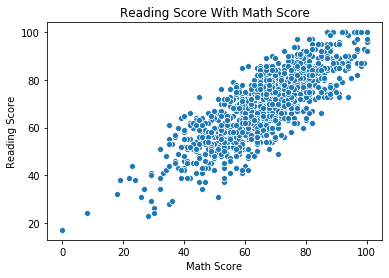

In [25]:
sns.scatterplot(data=df, x="math score", y="reading score")
plt.ylabel('Reading Score')
plt.xlabel('Math Score')
plt.title('Reading Score With Math Score')

Text(0.5, 1.0, 'Reading Score Vs Writing Score With Gender')

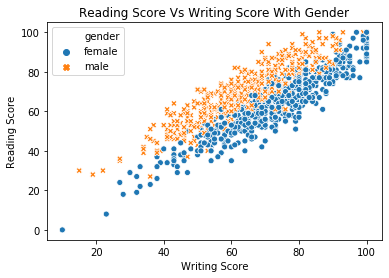

In [26]:
sns.scatterplot(data=df, x="writing score", y="math score", hue="gender", style="gender")
plt.ylabel('Reading Score')
plt.xlabel('Writing Score')
plt.title('Reading Score Vs Writing Score With Gender')

Text(0.5, 1.0, 'Math Score Vs Writing Score With Parental Level Of Education')

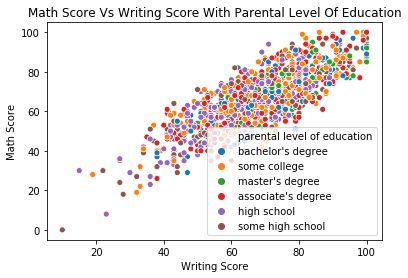

In [27]:
sns.scatterplot(data=df, x="writing score", y="math score", hue="parental level of education")
plt.ylabel('Math Score')
plt.xlabel('Writing Score')
plt.title('Math Score Vs Writing Score With Parental Level Of Education')

In [28]:
fig = px.scatter(df, x='math score', y='writing score')
fig.update_layout(title='Math Score Vs Writing Score',xaxis_title="Math Score",yaxis_title="Writing Score",title_x=0.5)
fig.show()

In [29]:
fig = px.scatter(df, x='math score', y='writing score', color='gender')
fig.update_layout(title='Math Score Vs Writing Score With Gender',xaxis_title="Math Score",yaxis_title="Writing Score",title_x=0.5)
fig.show()

In [30]:
fig = go.Figure(data=go.Scatter(x=df['parental level of education'],
                                y=df['math score'],
                                mode='markers',
                                marker_color=df['math score'],
                                text=df['parental level of education'])) # hover text goes here

fig.update_layout(title='Math Score With Parental Level Of Education',title_x=0.5)
fig.show()

In [31]:
fig = px.scatter(df, x='math score', y='writing score', color='parental level of education')
fig.update_layout(title='Math Score Vs Writing Score With Parental Level Of Education',xaxis_title="Math Score",yaxis_title="Writing Score",title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Reading Score Vs Math Score ')

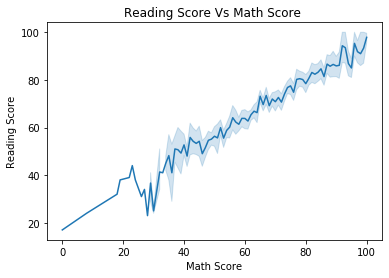

In [32]:
sns.lineplot(data=df, x="math score", y="reading score")
plt.ylabel('Reading Score')
plt.xlabel('Math Score')
plt.title('Reading Score Vs Math Score ')

Text(0.5, 1.0, 'Reading Score Vs Math Score With Gender')

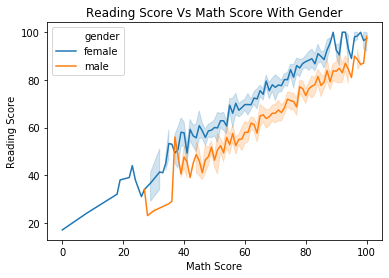

In [33]:
sns.lineplot(data=df, x="math score", y="reading score",hue='gender')
plt.ylabel('Reading Score')
plt.xlabel('Math Score')
plt.title('Reading Score Vs Math Score With Gender')

Text(0.5, 1.0, 'Reading Score Vs Math Score With Race')

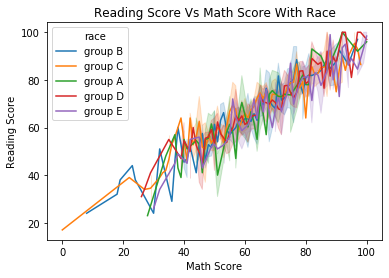

In [34]:
sns.lineplot(data=df, x="math score", y="reading score", hue="race")
plt.ylabel('Reading Score')
plt.xlabel('Math Score')
plt.title('Reading Score Vs Math Score With Race')

In [35]:
df_rece_gender_reading=df.groupby(by =['race','parental level of education'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

df_groupa=df_rece_gender_reading[df_rece_gender_reading['Race']=='group A']

fig = go.Figure(go.Scatter(x=df_groupa['parental level of education'], y=df_groupa['Reading Score']))
fig.show()

In [36]:
df_rece_gender_reading=df.groupby(by =['race','parental level of education'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

df_groupa=df_rece_gender_reading[df_rece_gender_reading['Race']=='group A']
df_groupb=df_rece_gender_reading[df_rece_gender_reading['Race']=='group B']
df_groupc=df_rece_gender_reading[df_rece_gender_reading['Race']=='group C']

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_groupa['parental level of education'],
                         y=df_groupa['Reading Score'],
                    mode='lines+markers',
                    name='group A'))
fig.add_trace(go.Scatter(x=df_groupb['parental level of education'],
                         y=df_groupb['Reading Score'],
                    mode='lines',
                    name='group B'))
fig.add_trace(go.Scatter(x=df_groupc['parental level of education'],
                         y=df_groupc['Reading Score'],
                    mode='markers', name='group C'))

fig.show()

In [37]:
df_rece_gender_reading=df.groupby(by =['race','parental level of education'])['reading score'].mean().to_frame().reset_index().rename(columns={'race':'Race','reading score':'Reading Score'})

df_groupd=df_rece_gender_reading[df_rece_gender_reading['Race']=='group D']
df_groupe=df_rece_gender_reading[df_rece_gender_reading['Race']=='group E']


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_groupd['parental level of education'],
                         y=df_groupd['Reading Score'],
                         name='group D',
                         line=dict(color='brown', width=4,dash="dash")))
fig.add_trace(go.Scatter(x=df_groupe['parental level of education'],
                         y=df_groupe['Reading Score'],
                         name='group E',
                         line=dict(color='green', width=4,dash="dashdot")))


fig.show()

Text(0.5, 1.0, 'Race ')

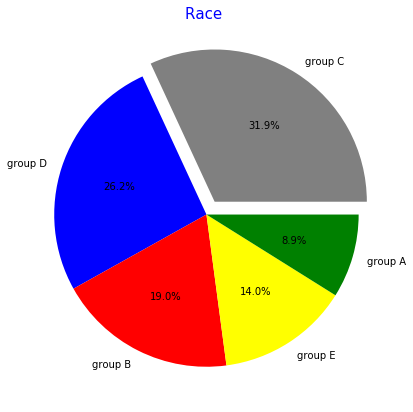

In [38]:
labels = df.race.value_counts().index
colors = ['grey','blue','red','yellow','green']
explode = [0.1,0,0,0,0]
sizes = df.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Race ',color = 'blue',fontsize = 15)

In [39]:
df_category=df['gender'].value_counts().to_frame().reset_index().rename(columns={'index':'gender','gender':'count'})


fig = go.Figure([go.Pie(labels=df_category['gender'], values=df_category['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [40]:
df_category=df['parental level of education'].value_counts().to_frame().reset_index().rename(columns={'index':'parental level of education','parental level of education':'count'})


fig = go.Figure([go.Pie(labels=df_category['parental level of education'], values=df_category['count'],hole=0.3)]) # can change the size of hole 

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Parental Level Of Education Students Count",title_x=0.5)
fig.show()

In [41]:
df_race=df['race'].value_counts().to_frame().reset_index().rename(columns={'index':'race','race':'count'})

colors=['cyan','royalblue','blue','darkblue',"darkcyan"]
fig = go.Figure([go.Pie(labels=df_race['race'], values=df_race['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Race Students Count",title_x=0.5)
fig.show()

In [42]:
df_parental=df['parental level of education'].value_counts().to_frame().reset_index().rename(columns={'index':'parental level of education','parental level of education':'Count'})
df_parental

fig = go.Figure(data=[go.Scatter(
    x=df_parental['parental level of education'], y=df_parental['Count'],
    mode='markers',
    marker=dict(
        color=df_parental['Count'],
        size=df_parental['Count']*0.3, # Multiplying by 0.3 to reduce size and stay uniform accross all points
        showscale=True
    ))])

fig.update_layout(title='Parental Level Of Education',xaxis_title="Level Of Education",yaxis_title="Number Of Student",title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Gender Count')

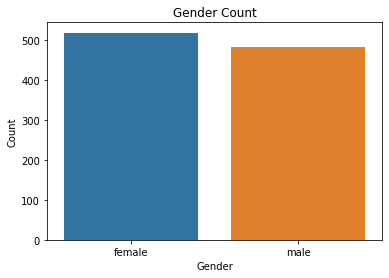

In [43]:
ax = sns.countplot(x="gender", data=df)
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Gender Count')

Text(0.5, 1.0, 'Gender Count With Race')

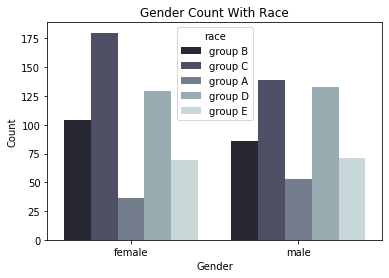

In [44]:
ax = sns.countplot(x="gender", hue='race',data=df,palette='bone')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Gender Count With Race')

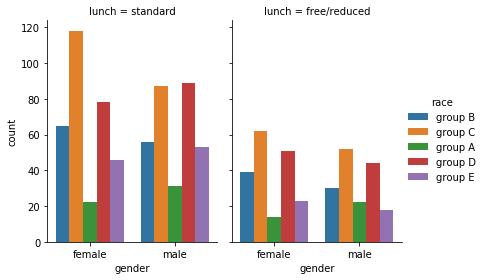

In [45]:
g = sns.catplot(x="gender", hue="race", col="lunch",
                data=df, kind="count",
                height=4, aspect=.7)

In [46]:
ax = sns.swarmplot(x=df["math score"])
plt.xlabel('Math Score')
plt.title('Math Score Distribution')

Text(0.5, 1.0, 'Math Score Distribution')

In [47]:
ax = sns.swarmplot(y="math score",x='race',data=df)
plt.ylabel('Math Score')
plt.title('Math Score Distribution With Race')

Text(0.5, 1.0, 'Math Score Distribution With Race')

Text(0.5, 1.0, 'Math Score Distribution With Gender')

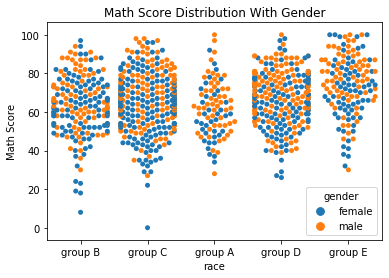

In [48]:
ax = sns.swarmplot(x="race", y="math score", hue="gender", data=df)
plt.ylabel('Math Score');
plt.title('Math Score Distribution With Gender')

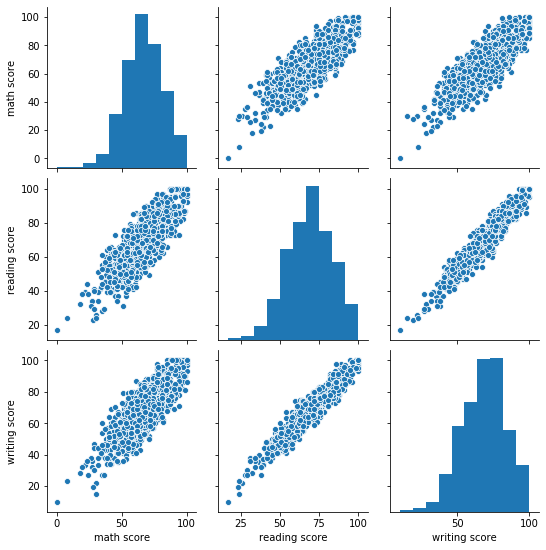

In [49]:
sns.pairplot(df)

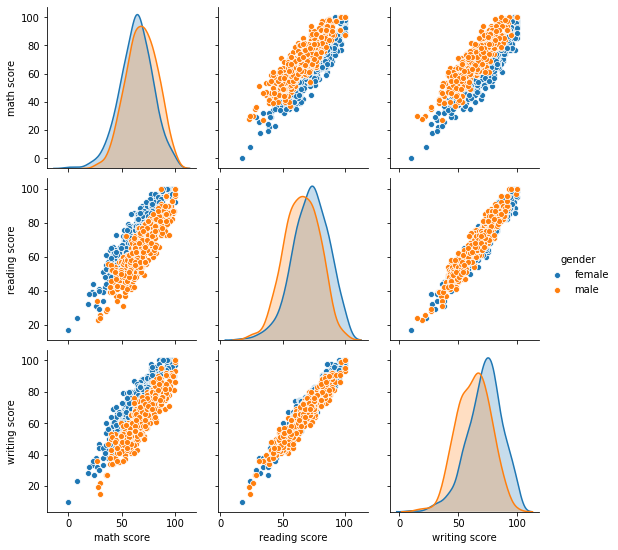

In [50]:
sns.pairplot(df, hue="gender")

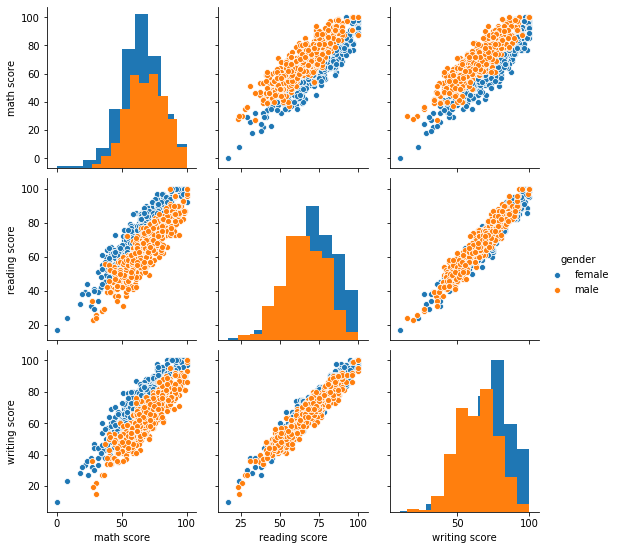

In [51]:
sns.pairplot(df, hue="gender", diag_kind="hist")

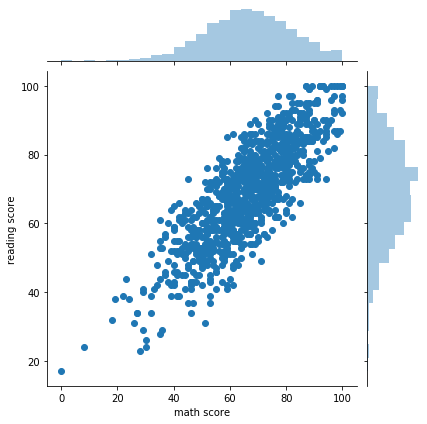

In [52]:
sns.jointplot(data=df, x="math score", y="reading score")

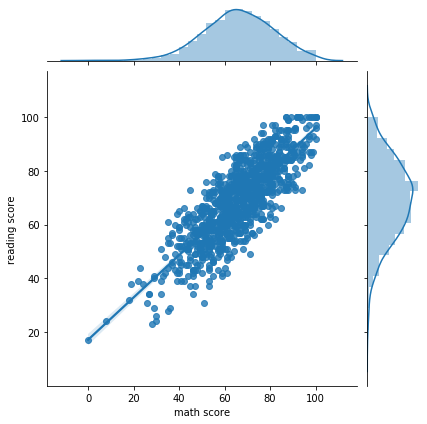

In [53]:
sns.jointplot(data=df, x="math score", y="reading score", kind="reg")

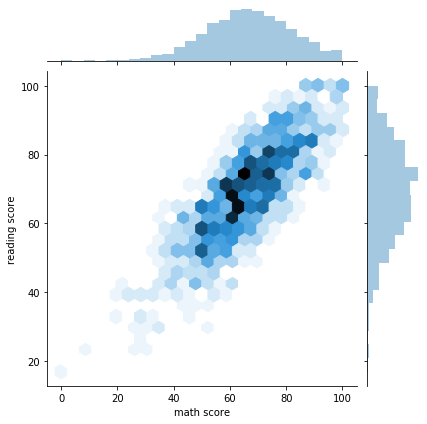

In [54]:
sns.jointplot(data=df, x="math score", y="reading score", kind="hex")

Text(0, 0.5, 'Math Score')

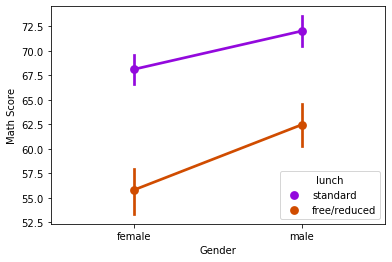

In [55]:
ax = sns.pointplot(y="math score", x="gender", data=df,hue='lunch',palette="gnuplot")
plt.xlabel('Gender')
plt.ylabel('Math Score')

Text(0.5, 0, 'Math Score')

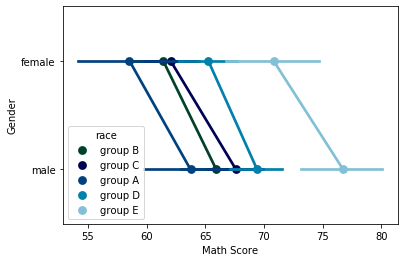

In [56]:
ax = sns.pointplot(x="math score", y="gender", data=df,hue='race',palette="ocean")
plt.ylabel('Gender')
plt.xlabel('Math Score')

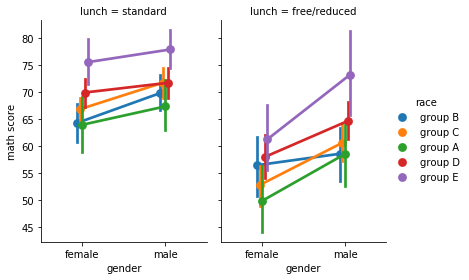

In [57]:
g = sns.catplot(x="gender", y="math score",
                hue="race", col="lunch",
                data=df, kind="point",
                dodge=True,
                height=4, aspect=.7)

Text(0.5, 0, 'Math Score')

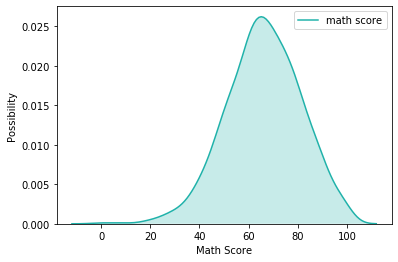

In [58]:
sns.kdeplot(df['math score'],shade=True,color='LightSeaGreen');
plt.ylabel('Possibility')
plt.xlabel('Math Score')

Text(0.5, 0, 'Score')

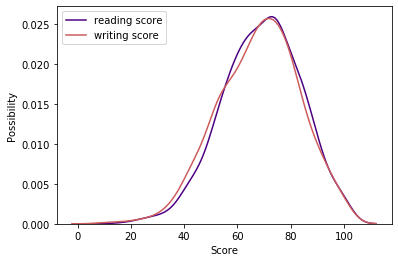

In [59]:
sns.kdeplot(df['reading score'],color='Indigo')
sns.kdeplot(df['writing score'],color='IndianRed')
plt.ylabel('Possibility')
plt.xlabel('Score')

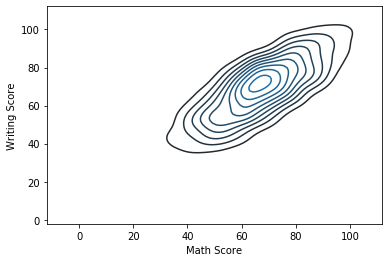

In [60]:
sns.kdeplot(df['math score'],df['writing score'])
plt.ylabel('Writing Score')
plt.xlabel('Math Score')
plt.show()

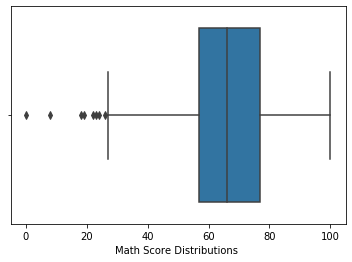

In [61]:
ax = sns.boxplot(x=df["math score"])

plt.xlabel('Math Score Distributions ')
plt.show()

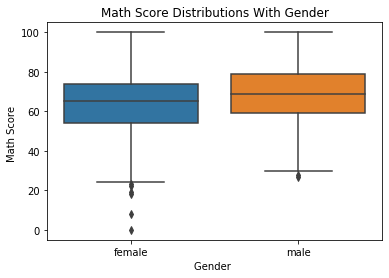

In [62]:
ax = sns.boxplot(y="math score", x="gender", data=df)
plt.ylabel('Math Score ')
plt.xlabel('Gender ')
plt.title('Math Score Distributions With Gender')
plt.show()

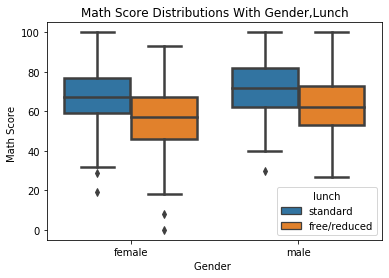

In [63]:
ax = sns.boxplot(x="gender", y="math score", hue="lunch",
                 data=df, linewidth=2.5)
plt.ylabel('Math Score ')
plt.xlabel('Gender ')
plt.title('Math Score Distributions With Gender,Lunch')
plt.show()

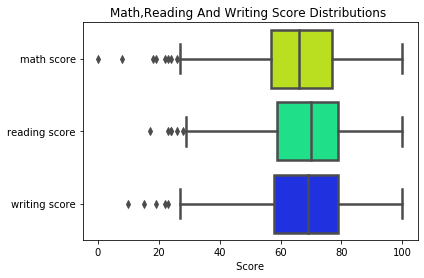

In [64]:
ax = sns.boxplot(data=df, orient="h", palette="gist_rainbow",linewidth=2.5)
plt.xlabel(' Score ')
plt.title('Math,Reading And Writing Score Distributions ')
plt.show()

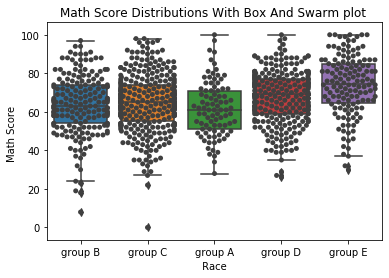

In [65]:
ax = sns.boxplot(x="race", y="math score", data=df)
ax = sns.swarmplot(x="race", y="math score", data=df, color=".25")
plt.xlabel(' Race ')
plt.ylabel('Math Score ')
plt.title('Math Score Distributions With Box And Swarm plot ')
plt.show()

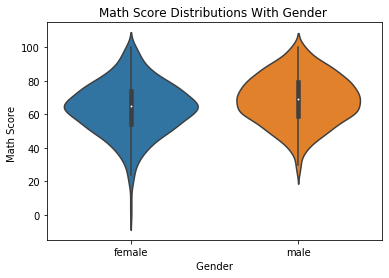

In [66]:
ax = sns.violinplot(x="gender", y="math score", data=df)
plt.xlabel(' Gender ')
plt.ylabel('Math Score ')
plt.title('Math Score Distributions With Gender ')
plt.show()

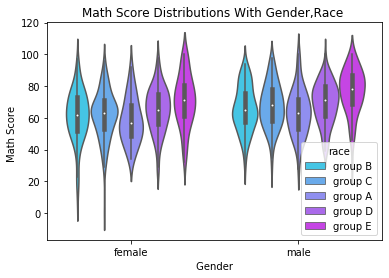

In [67]:
ax = sns.violinplot(x="gender", y="math score", hue="race",
                    data=df, palette="cool")
plt.xlabel(' Gender ')
plt.ylabel('Math Score ')
plt.title('Math Score Distributions With Gender,Race ')
plt.show()

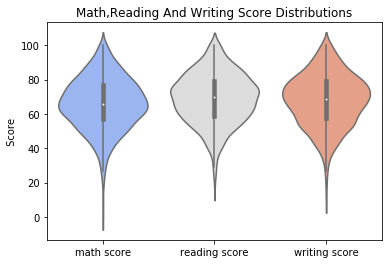

In [68]:
ax = sns.violinplot(data=df, palette="coolwarm")
plt.ylabel(' Score ')
plt.title('Math,Reading And Writing Score Distributions')
plt.show()

In [69]:
ax=sns.distplot(df["math score"])
plt.ylabel(' Possibility ')
plt.xlabel(' Score ')
plt.title('Math Score Distributions')
plt.show()

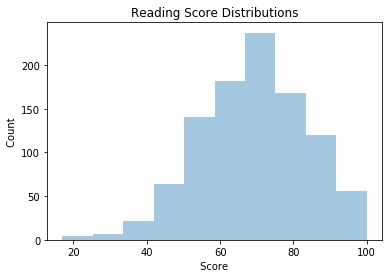

In [70]:
sns.distplot(df['reading score'], bins = 10, kde = False);
plt.ylabel(' Count ')
plt.xlabel(' Score ')
plt.title('Reading Score Distributions')
plt.show()

In [71]:
sns.heatmap(df.corr(),annot=True, linewidths=.5,fmt="f", cmap="inferno")
plt.show()

In [72]:
fig = go.Figure(data=[go.Histogram(x=df['math score'],  # To get Horizontal plot ,change axis 
                                  marker_color="DarkOrange",
                      xbins=dict(
                      start=0, #start range of bin
                      end=100,  #end range of bin
                      size=10    #size of bin
                      ))])
fig.update_layout(title="Distribution Of Math Score",xaxis_title="Points",yaxis_title="Counts",title_x=0.5)
fig.show()

In [73]:
fig = go.Figure(data=[go.Histogram(x=df['math score'],histnorm='probability',
                                  marker_color="orange")]) # To get Horizontal plot ,change axis 
fig.update_layout(title="Distribution of Math Score",xaxis_title="Score",yaxis_title="Possibility")
fig.show()

In [74]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['math score'],marker_color="green",name="Math"))
fig.add_trace(go.Histogram(x=df['reading score'],marker_color="orange",name="Reading"))
#fig.add_trace(go.Histogram(x=df['writing score'],marker_color="SaddleBrown",name="Writing"))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.55)
fig.update_layout(title="Distribution Of Math &  Reading Score",xaxis_title="Score",title_x=0.5,yaxis_title="Counts")
fig.show()

In [75]:
fig = go.Figure(go.Box(y=df['reading score'],name="Reading Score")) # to get Horizonal plot change axis 
fig.update_layout(title="Distribution of Reading Score",title_x=0.5)
fig.show()

In [76]:

fig = go.Figure()
fig.add_trace(go.Box(y=df['math score'],
                     marker_color="Maroon",
                     boxmean='sd',
                     name="Math Score"))
fig.add_trace(go.Box(y=df['reading score'],
                     boxmean=True,
                     marker_color="Plum",
                     name="Reading Score"))
fig.add_trace(go.Box(y=df['writing score'],
                     boxpoints='all',
                     marker_color="SandyBrown",
                     name="Writing Score"))
fig.update_layout(title="Distribution of Math Reading Writing Score",title_x=0.5)
fig.show()

In [77]:
fig = go.Figure(data=go.Violin(y=df['math score'],
                               marker_color="Sienna",
                               x0='Math score'))

fig.update_layout(title="Distribution of Math Score",title_x=0.5)
fig.show()

In [78]:
fig = go.Figure()
fig.add_trace(go.Violin(y=df['math score'],
                     marker_color="Tomato",
                     box_visible=True, 
                     name="Math Score"))

fig.add_trace(go.Violin(y=df['reading score'],
                     marker_color="darkcyan",
                     meanline_visible=True,
                     name="Reading Score"))

fig.add_trace(go.Violin(y=df['writing score'],
                     fillcolor="darkblue",
                     line_color='black',
                     opacity=0.6,
                     name="Writing Score"))

fig.update_layout(title="Distribution Of Score",title_x=0.5)
fig.show()

In [79]:
fig = px.sunburst(df, path=['gender', 'race','parental level of education',], values='math score',
                   color=df['math score'],
                  color_continuous_scale='electric')
fig.show()

In [80]:
df_all_100=df[(df['math score']==100)&(df['reading score']==100)&(df['writing score']==100)]

colors=['lightblue','lightpink','lightgreen','yellow','DarkSalmon','Khaki','LightCoral']
    
fig = go.Figure(data=[go.Table(header=dict(values=['Gender', 'Race','Parental Level Of Education','Test Preparation Course','Math Score','Reading Score','Writing Score'],
                                          line_color='white', fill_color='LightSlateGray',
                                  align='center',font=dict(color='white', size=12)
                                          ),
                               
                 cells=dict( values=[df_all_100['gender'], df_all_100['race'],df_all_100['parental level of education'],df_all_100['test preparation course'],df_all_100['math score'],df_all_100['reading score'],df_all_100['writing score']],
                           line_color=colors, fill_color=colors,
                           align='center', font=dict(color='#660033', size=11))
                              )])
                      
fig.show()

In [81]:
import sweetviz as sv

In [82]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [83]:
from IPython.display import IFrame

In [84]:
IFrame(src='Analyze.html',width=1000,height=600)

In [85]:
df.head()

gender     race parental level of education         lunch  \
0  female  group B           bachelor's degree      standard   
1  female  group C                some college      standard   
2  female  group B             master's degree      standard   
3    male  group A          associate's degree  free/reduced   
4    male  group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [86]:
df.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le=LabelEncoder()

In [89]:
df_col=['gender', 'race', 'parental level of education',
       'test preparation course']

In [90]:
df=df.drop(['lunch'],axis='columns')

In [91]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [92]:
df.head()

gender  race  parental level of education  test preparation course  \
0       0     1                            1                        1   
1       0     2                            4                        0   
2       0     1                            3                        1   
3       1     0                            0                        1   
4       1     2                            4                        1   

   math score  reading score  writing score  
0          72             72             74  
1          69             90             88  
2          90             95             93  
3          47             57             44  
4          76             78             75

In [93]:
x=df.drop(['gender'],axis='columns')
y=df.gender.values

In [94]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [95]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

88.0

In [96]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       158
           1       0.87      0.88      0.87       142

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [97]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

79.0

In [98]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       158
           1       0.76      0.82      0.79       142

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [99]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

83.33333333333334

In [100]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       158
           1       0.81      0.85      0.83       142

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

87.33333333333333

In [103]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       158
           1       0.86      0.88      0.87       142

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [104]:
from sklearn.ensemble import BaggingClassifier

In [105]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

84.33333333333334

In [106]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       158
           1       0.83      0.84      0.84       142

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

70.33333333333334

In [109]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       158
           1       0.69      0.69      0.69       142

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [110]:
from sklearn.ensemble import ExtraTreesClassifier

In [111]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

83.66666666666667

In [112]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       158
           1       0.83      0.83      0.83       142

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [113]:
from sklearn.svm import SVC

In [114]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

87.33333333333333

In [115]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       158
           1       0.86      0.87      0.87       142

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

85.66666666666667

In [118]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       158
           1       0.85      0.85      0.85       142

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [119]:
from catboost import CatBoostClassifier

In [120]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.008847
0:	learn: 0.6902701	total: 456ms	remaining: 7m 35s
1:	learn: 0.6859552	total: 460ms	remaining: 3m 49s
2:	learn: 0.6819762	total: 463ms	remaining: 2m 33s
3:	learn: 0.6786136	total: 466ms	remaining: 1m 56s
4:	learn: 0.6732347	total: 469ms	remaining: 1m 33s
5:	learn: 0.6682259	total: 471ms	remaining: 1m 18s
6:	learn: 0.6646620	total: 475ms	remaining: 1m 7s
7:	learn: 0.6610624	total: 478ms	remaining: 59.3s
8:	learn: 0.6573717	total: 480ms	remaining: 52.9s
9:	learn: 0.6539309	total: 484ms	remaining: 47.9s
10:	learn: 0.6486759	total: 486ms	remaining: 43.7s
11:	learn: 0.6443722	total: 488ms	remaining: 40.2s
12:	learn: 0.6398814	total: 491ms	remaining: 37.3s
13:	learn: 0.6372231	total: 494ms	remaining: 34.8s
14:	learn: 0.6337451	total: 496ms	remaining: 32.6s
15:	learn: 0.6293460	total: 500ms	remaining: 30.7s
16:	learn: 0.6262069	total: 503ms	remaining: 29.1s
17:	learn: 0.6232729	total: 505ms	remaining: 27.6s
18:	learn: 0.6205105	total: 508ms	remaining: 26.2s
19:	l

170:	learn: 0.3717262	total: 936ms	remaining: 4.54s
171:	learn: 0.3710060	total: 938ms	remaining: 4.52s
172:	learn: 0.3705346	total: 940ms	remaining: 4.49s
173:	learn: 0.3700842	total: 942ms	remaining: 4.47s
174:	learn: 0.3692857	total: 945ms	remaining: 4.46s
175:	learn: 0.3687023	total: 947ms	remaining: 4.43s
176:	learn: 0.3681170	total: 949ms	remaining: 4.41s
177:	learn: 0.3674636	total: 951ms	remaining: 4.39s
178:	learn: 0.3666984	total: 952ms	remaining: 4.37s
179:	learn: 0.3658849	total: 954ms	remaining: 4.35s
180:	learn: 0.3649779	total: 957ms	remaining: 4.33s
181:	learn: 0.3642690	total: 959ms	remaining: 4.31s
182:	learn: 0.3634797	total: 962ms	remaining: 4.29s
183:	learn: 0.3629457	total: 964ms	remaining: 4.27s
184:	learn: 0.3621204	total: 966ms	remaining: 4.25s
185:	learn: 0.3616320	total: 968ms	remaining: 4.24s
186:	learn: 0.3604910	total: 970ms	remaining: 4.22s
187:	learn: 0.3599062	total: 974ms	remaining: 4.21s
188:	learn: 0.3593092	total: 976ms	remaining: 4.19s
189:	learn: 

385:	learn: 0.2742876	total: 1.39s	remaining: 2.21s
386:	learn: 0.2740049	total: 1.39s	remaining: 2.2s
387:	learn: 0.2738262	total: 1.39s	remaining: 2.2s
388:	learn: 0.2734662	total: 1.4s	remaining: 2.19s
389:	learn: 0.2732477	total: 1.4s	remaining: 2.19s
390:	learn: 0.2730217	total: 1.4s	remaining: 2.19s
391:	learn: 0.2727924	total: 1.41s	remaining: 2.18s
392:	learn: 0.2724499	total: 1.41s	remaining: 2.17s
393:	learn: 0.2722656	total: 1.41s	remaining: 2.17s
394:	learn: 0.2720435	total: 1.41s	remaining: 2.16s
395:	learn: 0.2718181	total: 1.42s	remaining: 2.16s
396:	learn: 0.2717308	total: 1.42s	remaining: 2.15s
397:	learn: 0.2715888	total: 1.42s	remaining: 2.15s
398:	learn: 0.2713374	total: 1.42s	remaining: 2.14s
399:	learn: 0.2711409	total: 1.42s	remaining: 2.13s
400:	learn: 0.2709893	total: 1.43s	remaining: 2.13s
401:	learn: 0.2706737	total: 1.43s	remaining: 2.12s
402:	learn: 0.2702777	total: 1.43s	remaining: 2.12s
403:	learn: 0.2701014	total: 1.43s	remaining: 2.11s
404:	learn: 0.269

606:	learn: 0.2234037	total: 1.85s	remaining: 1.2s
607:	learn: 0.2233097	total: 1.85s	remaining: 1.2s
608:	learn: 0.2231705	total: 1.85s	remaining: 1.19s
609:	learn: 0.2230446	total: 1.86s	remaining: 1.19s
610:	learn: 0.2228327	total: 1.86s	remaining: 1.18s
611:	learn: 0.2226010	total: 1.86s	remaining: 1.18s
612:	learn: 0.2224235	total: 1.86s	remaining: 1.18s
613:	learn: 0.2221913	total: 1.86s	remaining: 1.17s
614:	learn: 0.2218498	total: 1.87s	remaining: 1.17s
615:	learn: 0.2216653	total: 1.87s	remaining: 1.16s
616:	learn: 0.2213855	total: 1.87s	remaining: 1.16s
617:	learn: 0.2212502	total: 1.87s	remaining: 1.16s
618:	learn: 0.2211694	total: 1.87s	remaining: 1.15s
619:	learn: 0.2209547	total: 1.88s	remaining: 1.15s
620:	learn: 0.2207620	total: 1.88s	remaining: 1.15s
621:	learn: 0.2205922	total: 1.88s	remaining: 1.14s
622:	learn: 0.2204087	total: 1.88s	remaining: 1.14s
623:	learn: 0.2202102	total: 1.88s	remaining: 1.13s
624:	learn: 0.2199485	total: 1.89s	remaining: 1.13s
625:	learn: 0.

840:	learn: 0.1814732	total: 2.31s	remaining: 438ms
841:	learn: 0.1813611	total: 2.32s	remaining: 435ms
842:	learn: 0.1811691	total: 2.32s	remaining: 432ms
843:	learn: 0.1810833	total: 2.32s	remaining: 429ms
844:	learn: 0.1809460	total: 2.32s	remaining: 426ms
845:	learn: 0.1808458	total: 2.32s	remaining: 423ms
846:	learn: 0.1805613	total: 2.33s	remaining: 420ms
847:	learn: 0.1805029	total: 2.33s	remaining: 417ms
848:	learn: 0.1804250	total: 2.33s	remaining: 414ms
849:	learn: 0.1803384	total: 2.33s	remaining: 411ms
850:	learn: 0.1802557	total: 2.33s	remaining: 409ms
851:	learn: 0.1801717	total: 2.33s	remaining: 406ms
852:	learn: 0.1801041	total: 2.34s	remaining: 403ms
853:	learn: 0.1799049	total: 2.34s	remaining: 400ms
854:	learn: 0.1797155	total: 2.34s	remaining: 397ms
855:	learn: 0.1795776	total: 2.34s	remaining: 394ms
856:	learn: 0.1794818	total: 2.34s	remaining: 391ms
857:	learn: 0.1793857	total: 2.35s	remaining: 388ms
858:	learn: 0.1793112	total: 2.35s	remaining: 386ms
859:	learn: 

In [121]:
cat.score(xtest,ytest)*100

87.33333333333333

In [122]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

Model      Score
0      LogisticRegression  88.000000
3      AdaBoostClassifier  87.333333
6      AdaBoostClassifier  87.333333
8                     SVM  87.333333
9  RandomForestClassifier  85.666667
4       BaggingClassifier  84.333333
7    ExtraTreesClassifier  83.666667
2    KNeighborsClassifier  83.333333
1  DecisionTreeClassifier  79.000000
5              GaussianNB  70.333333

In [124]:
df.columns

Index(['gender', 'race', 'parental level of education',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [128]:
df2=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/StudentsPerformance.csv')
df2.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [129]:
object_col=[]
num_col=[]
for i in df2.columns:
    if df2[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [130]:
object_col

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [131]:
num_col

['math score', 'reading score', 'writing score']

In [132]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to 

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

RecursionError: maximum recursion depth exceeded while calling a Python object

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to 

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans'] not found. Falling back to

RecursionError: maximum recursion depth exceeded in comparison

<Figure size 1500x900 with 2 Axes>